# AQI Prediction Model using Python

- PM2.5, PM10
- NO, NO2
- NH3- Ammonia
- CO
- So2
- O3
- Benzene, Tolune, Xylene

In [1]:
#Importing necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('air quality data.csv ')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df.shape

(29531, 16)

In [4]:
#informtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
#To know the duplicate values
df.duplicated().sum()

0

In [6]:
#To check missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
#drop the rows where AQI has missing values
df.dropna(subset = ['AQI'], inplace = True)

In [8]:
df.isnull().sum().sort_values(ascending = False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [9]:
df.shape

(24850, 16)

In [10]:
#Summary of statistics of dataset
#df.describe()
#Change rows into columns
df.describe().T #transpose

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [11]:
#percentage of null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()* 100).sort_values(ascending = False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

## Key Consideration
- Xylene has the hieghest percentage of missing values - 61.86% 
- PM10 and NH# 28 - 26%

# Week 2 - Visualization

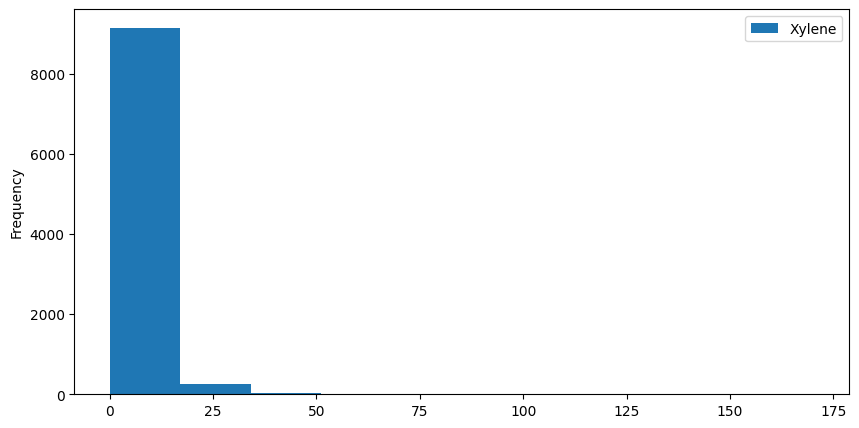

In [12]:
#univariate
df['Xylene'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

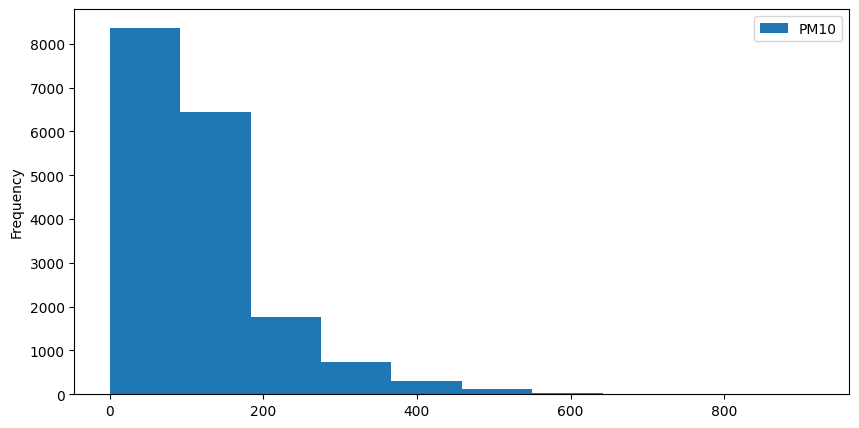

In [13]:
df['PM10'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

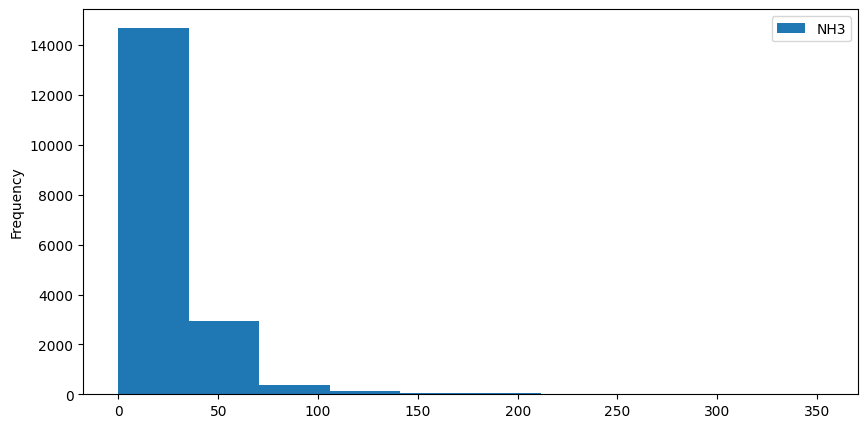

In [14]:
df['NH3'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

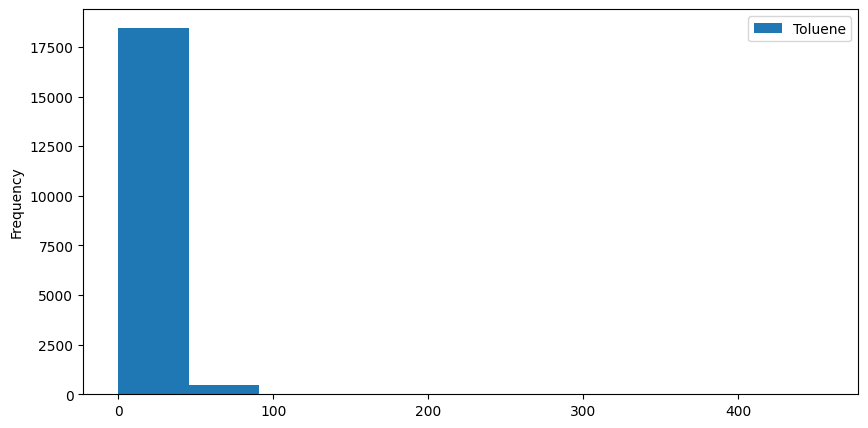

In [15]:
df['Toluene'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

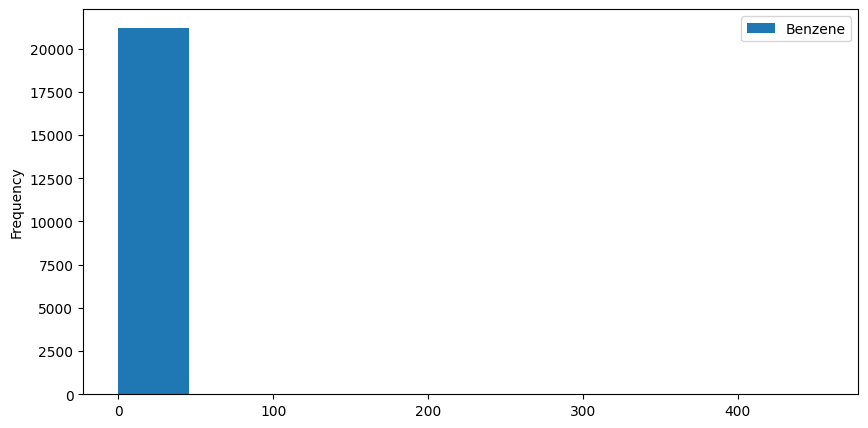

In [16]:
df['Benzene'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

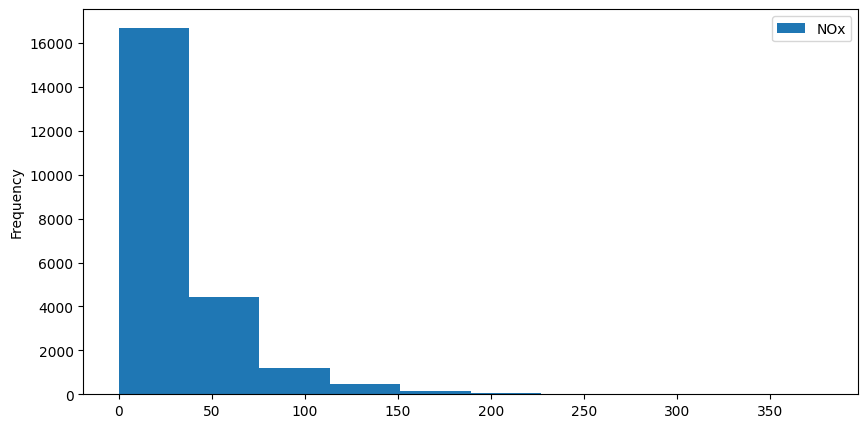

In [17]:
df['NOx'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

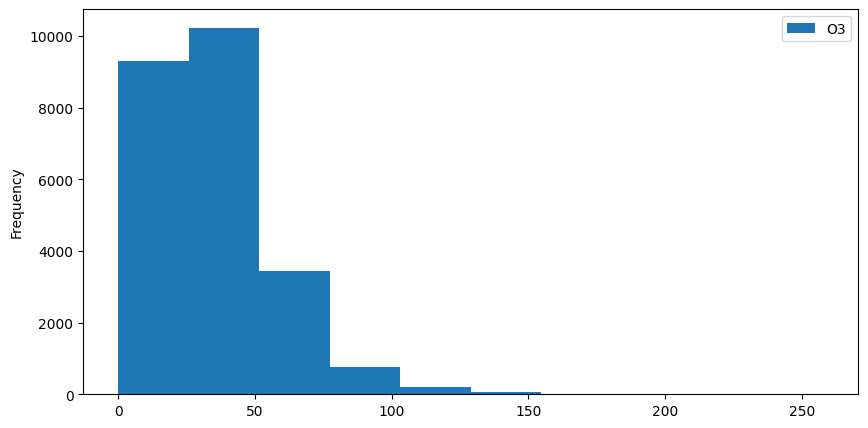

In [18]:
df['O3'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

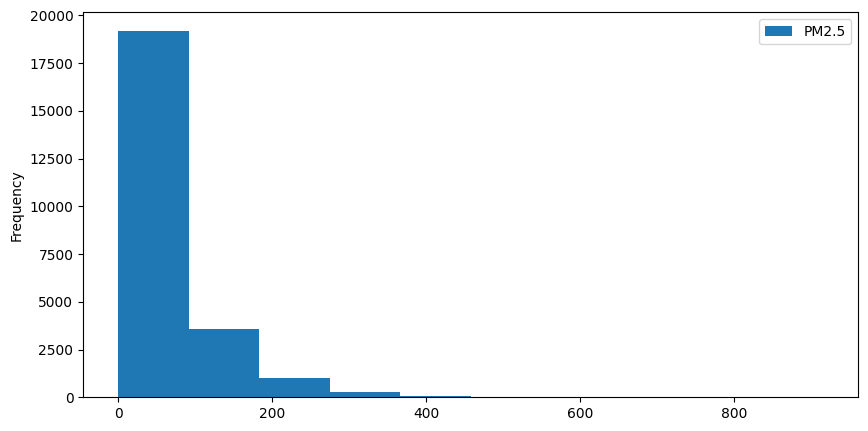

In [19]:
df['PM2.5'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

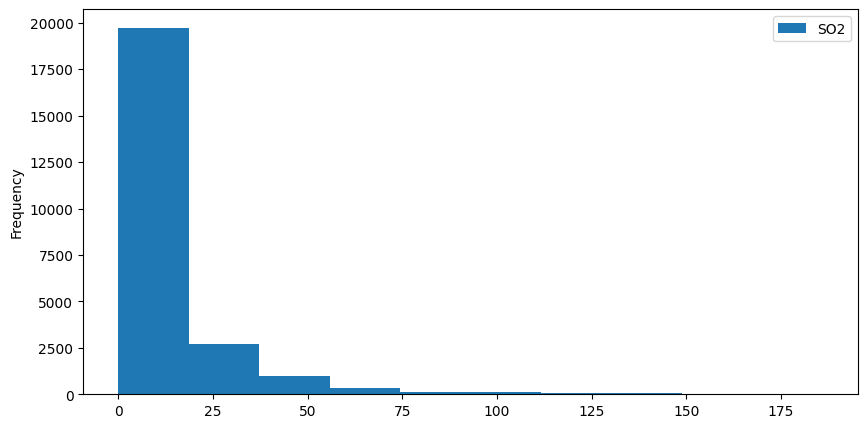

In [20]:
df['SO2'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

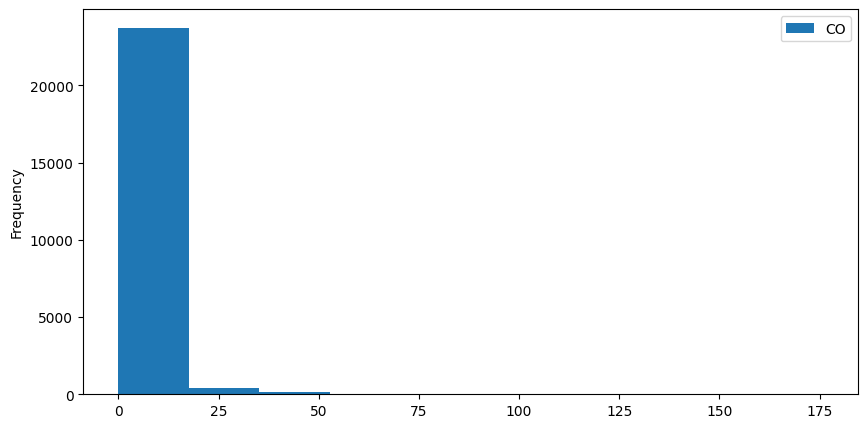

In [21]:
df['CO'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

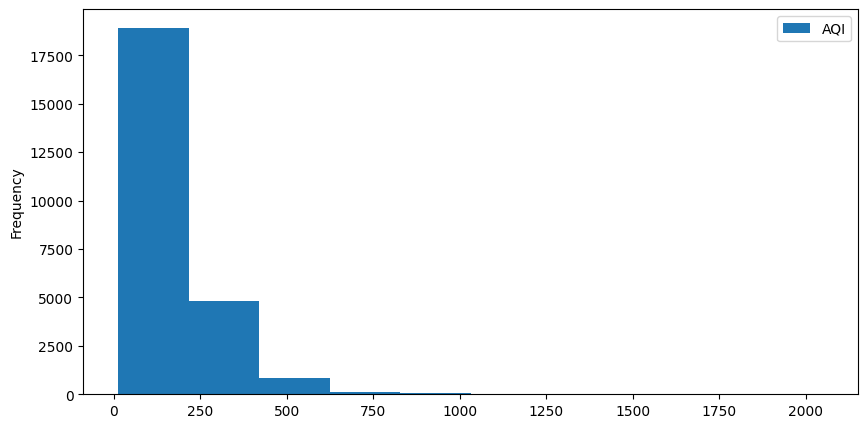

In [22]:
df['AQI'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

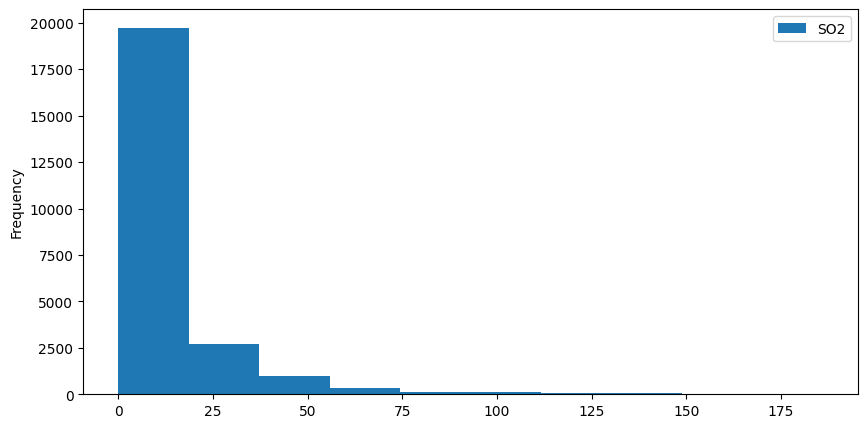

In [23]:
df['SO2'].plot(kind = 'hist', figsize = (10, 5))
plt.legend()
plt.show()

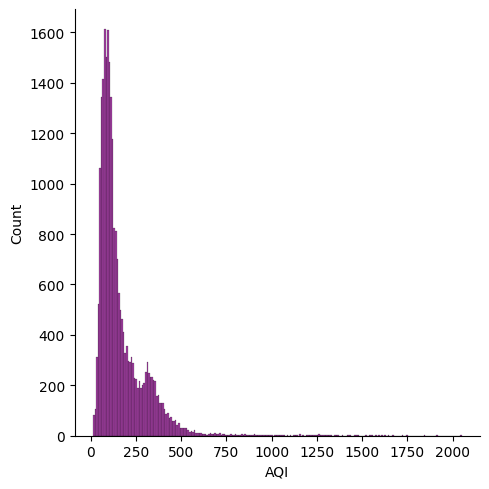

In [24]:
#Distribution of AQI from 2015 to 2020
sns.displot(df, x = 'AQI', color = 'purple')

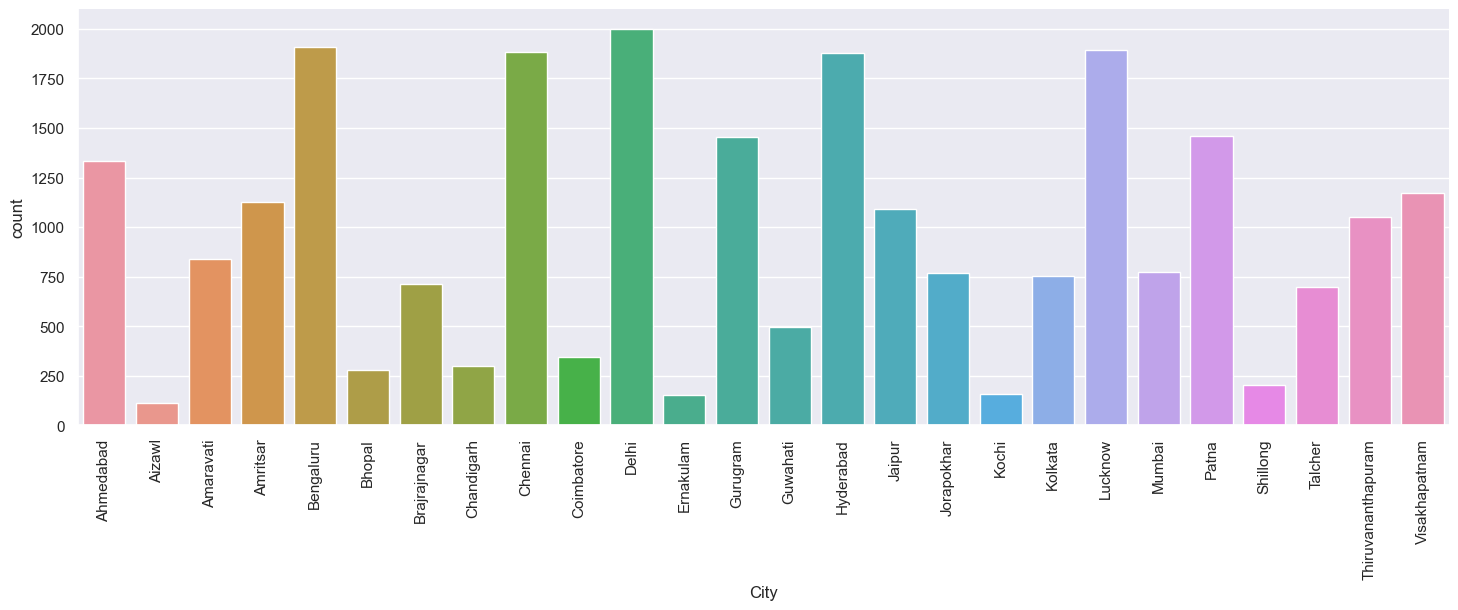

In [25]:
#Bivariate Analysis
sns.set_theme(style = 'darkgrid')
graph = sns.catplot(x = 'City', kind = 'count', data = df, height = 5, aspect = 3)
graph.set_xticklabels(rotation = 90)

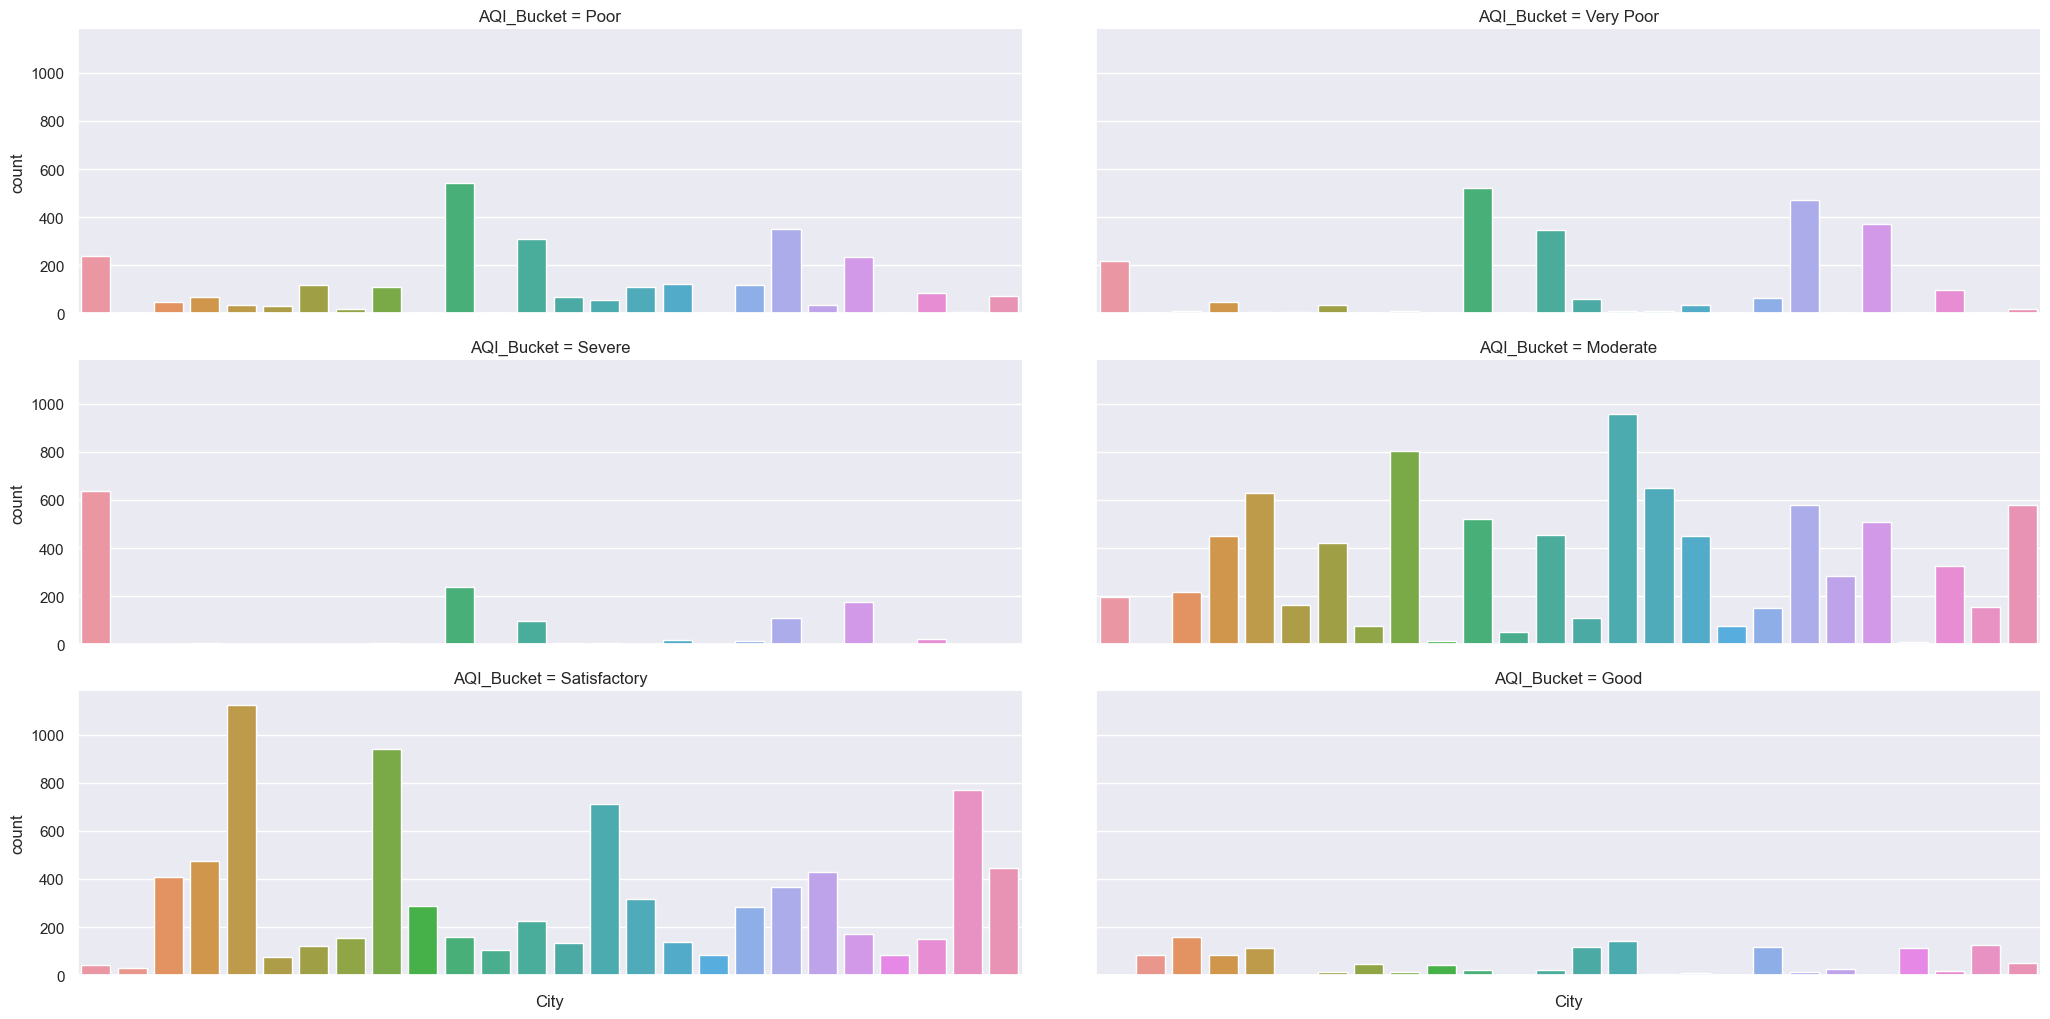

In [26]:
sns.set_theme(style = 'darkgrid')
graph = sns.catplot(x = 'City', kind = 'count', data = df, col = 'AQI_Bucket',col_wrap = 2, height = 3.5, aspect = 3)
graph.set_xticklabels(rotation = 90)

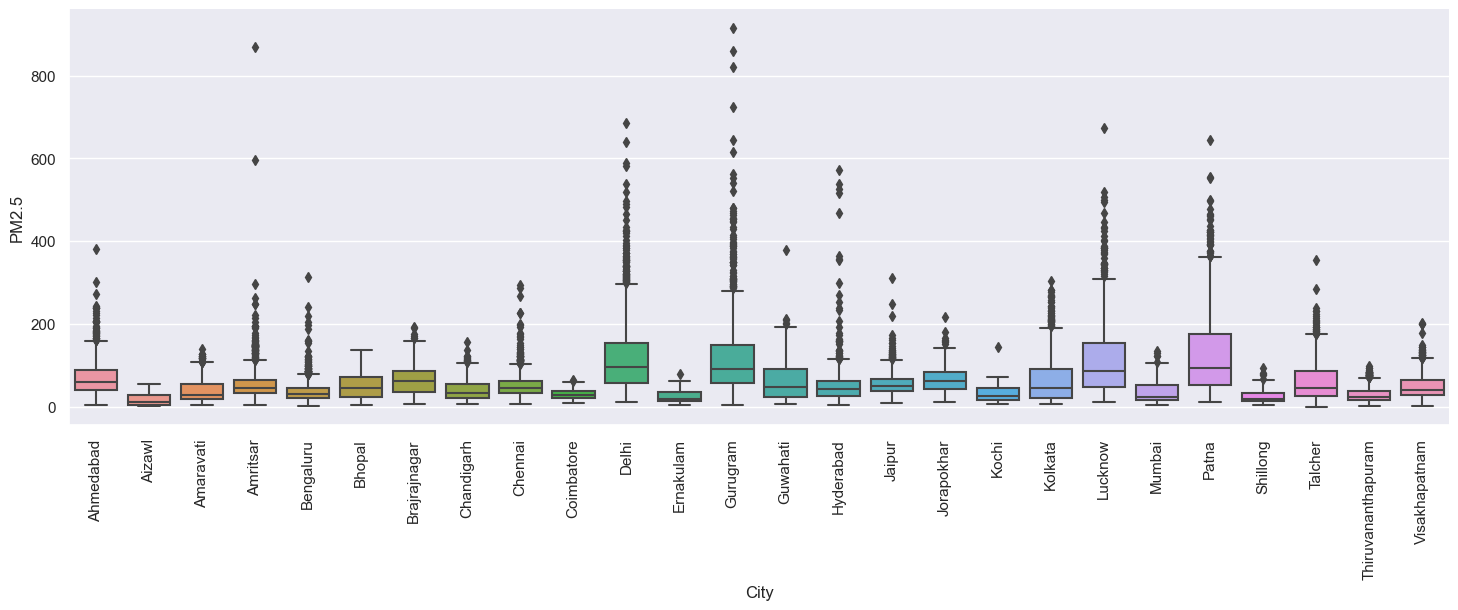

In [27]:
graph1 = sns.catplot(x = 'City', y = 'PM2.5', kind = 'box', data = df, height = 5, aspect = 3)
graph1.set_xticklabels(rotation = 90)

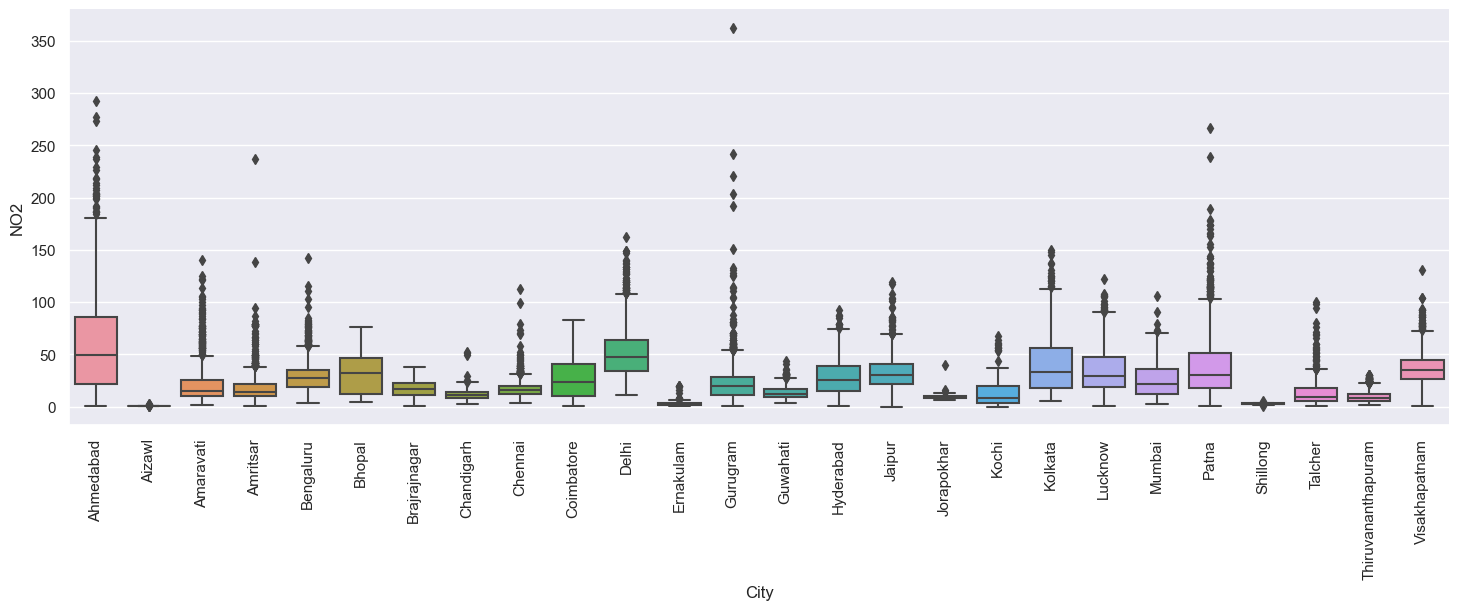

In [28]:
graph2 = sns.catplot(x = 'City', y = 'NO2', kind = 'box', data = df, height = 5, aspect = 3)
graph2.set_xticklabels(rotation = 90)

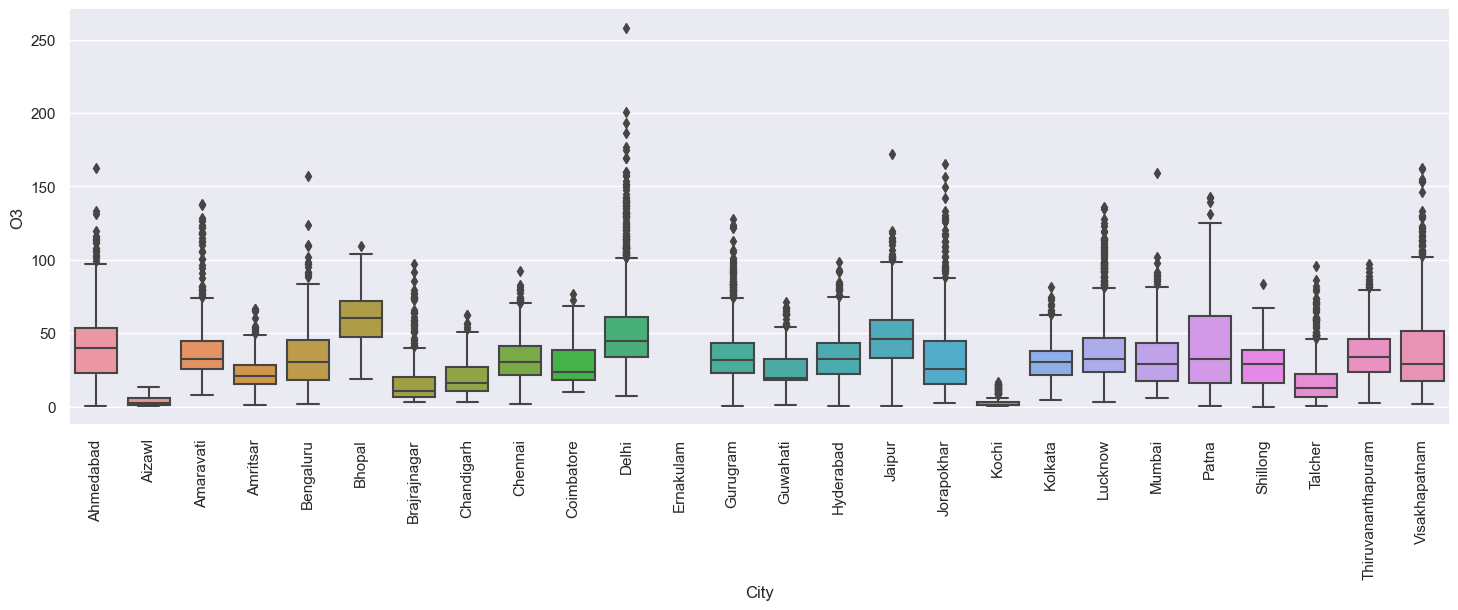

In [29]:
graph3 = sns.catplot(x = 'City', y = 'O3', kind = 'box', data = df, height = 5, aspect = 3)
graph3.set_xticklabels(rotation = 90)

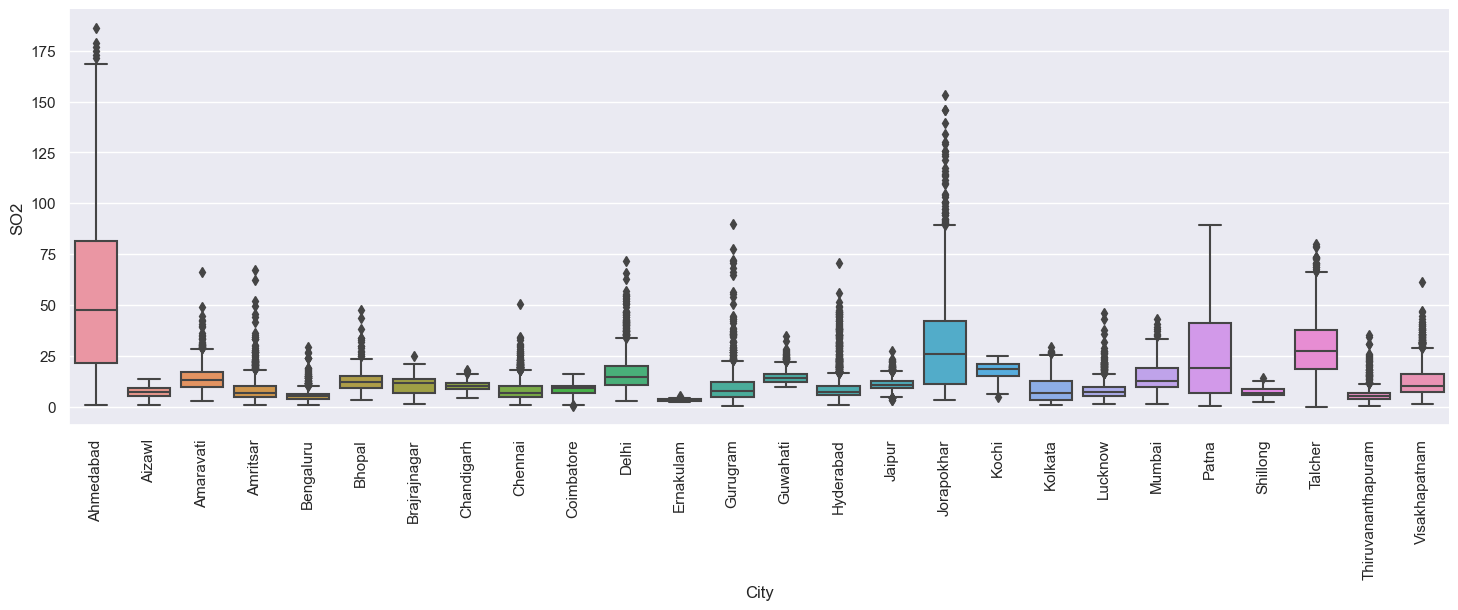

In [30]:
graph4 = sns.catplot(x = 'City', y = 'SO2', kind = 'box', data = df, height = 5, aspect = 3)
graph4.set_xticklabels(rotation = 90)

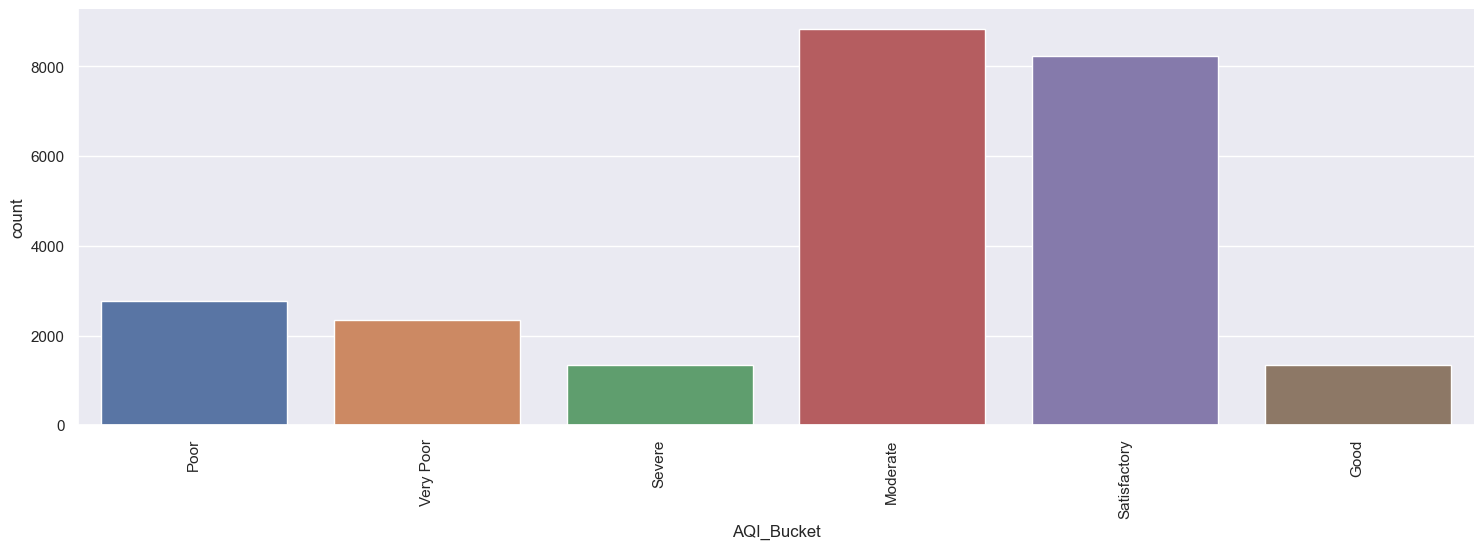

In [31]:
graph6 = sns.catplot(x = 'AQI_Bucket', data = df, kind = 'count', height = 5, aspect = 3)
graph6.set_xticklabels(rotation = 90)

In [32]:
#To check the null values
df.isnull().sum().sort_values(ascending = False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [33]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [34]:
df = df.replace({
    'PM2.5':{np.nan:67.476613},
    'PM10':{np.nan:118.454435},
    'NO':{np.nan:17.622421},
    'NO2':{np.nan:28.978391},
    'NOx':{np.nan:32.289012},
    'NH3':{np.nan:23.848366},
    'CO':{np.nan:2.345267},
    'SO2':{np.nan:14.362933},
    'O3':{np.nan:34.912885},
    'Benzene':{np.nan:3.458668},
    'Toluene':{np.nan:9.525714},
    'Xylene':{np.nan:3.588683},   
})

In [35]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [36]:
df = df.drop(['AQI_Bucket'], axis = 1)

In [37]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     24850 non-null  object 
 1   Date     24850 non-null  object 
 2   PM2.5    24850 non-null  float64
 3   PM10     24850 non-null  float64
 4   NO       24850 non-null  float64
 5   NO2      24850 non-null  float64
 6   NOx      24850 non-null  float64
 7   NH3      24850 non-null  float64
 8   CO       24850 non-null  float64
 9   SO2      24850 non-null  float64
 10  O3       24850 non-null  float64
 11  Benzene  24850 non-null  float64
 12  Toluene  24850 non-null  float64
 13  Xylene   24850 non-null  float64
 14  AQI      24850 non-null  float64
dtypes: float64(13), object(2)
memory usage: 3.5+ MB


<Axes: >

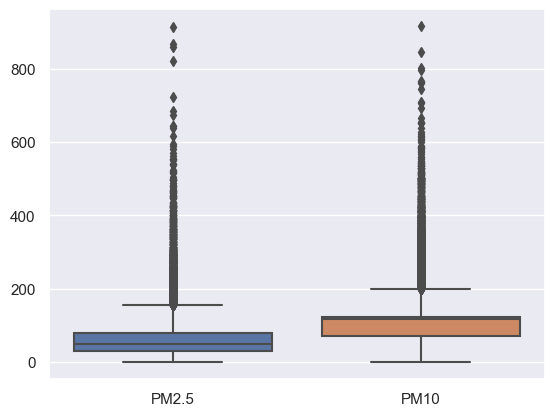

In [39]:
sns.boxplot(data = df[['PM2.5', 'PM10']])

<Axes: >

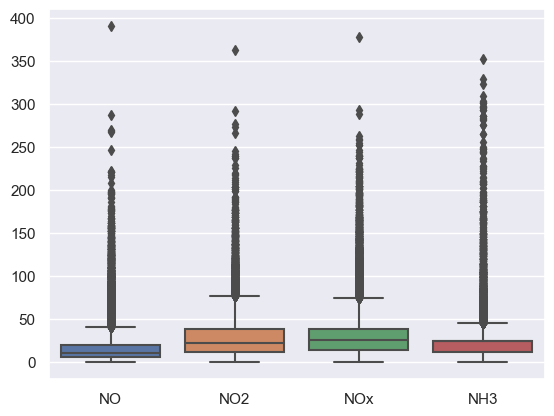

In [40]:
sns.boxplot(data = df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

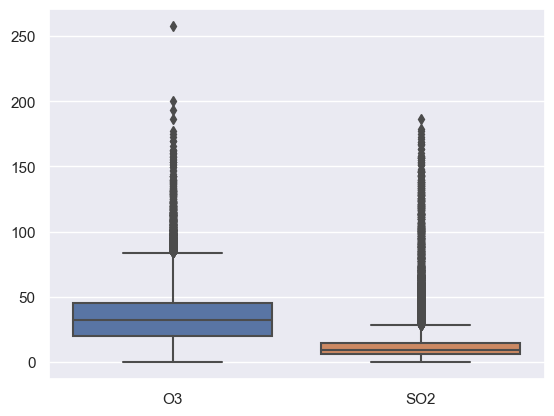

In [41]:
sns.boxplot(data = df[['O3','SO2']])

In [64]:
#IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        LB = Q1 - 1.5 * IQR
        UB = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: LB if x < LB else (UB if x > UB else x)
        )
    return df
        

In [65]:
df = replace_outliers(df)
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,55.174281,101.351323,12.507694,25.901114,26.574513,19.486584,1.040507,10.334743,33.177781,2.098520,6.222709,3.304507,146.932032
std,31.829575,39.079916,8.762015,16.669494,16.138682,9.630370,0.615436,5.680901,17.487724,1.828135,4.696068,0.558607,87.421731
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,1.250000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,2.650000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,3.588683,118.000000
75%,79.505625,122.955625,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.395625,3.458668,9.525714,3.588683,208.000000
max,154.300000,199.700000,40.680000,76.620000,74.380000,44.850000,2.940000,28.520000,83.990000,8.130000,21.440000,4.990000,398.000000


<Axes: >

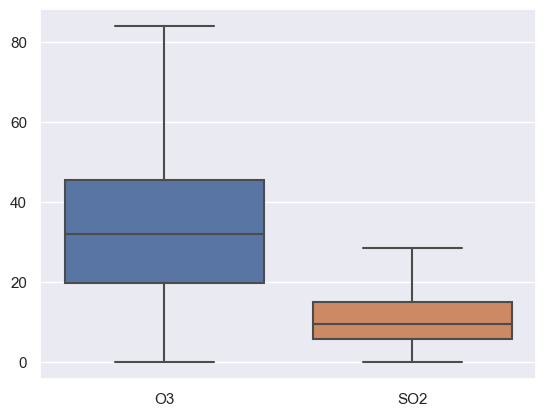

In [44]:
sns.boxplot(data = df[['O3','SO2']])

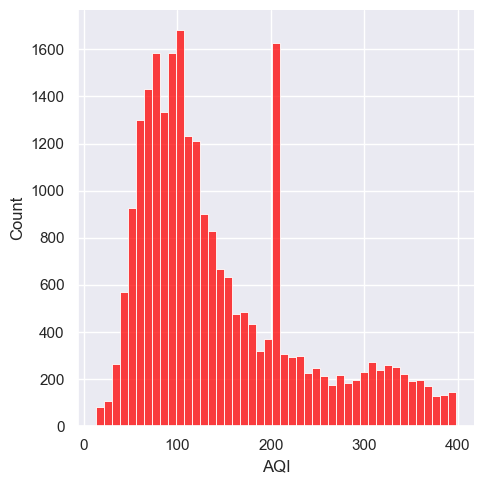

In [45]:
sns.displot(df, x = 'AQI', color = 'red')
plt.show()

In [46]:
df.drop(['City','Date'], axis = 1, inplace = True)
#df1 = df.drop(columns = 'City', axis = 1)
#df1 = df.drop(df.columns[[0,1]], axis = 1)

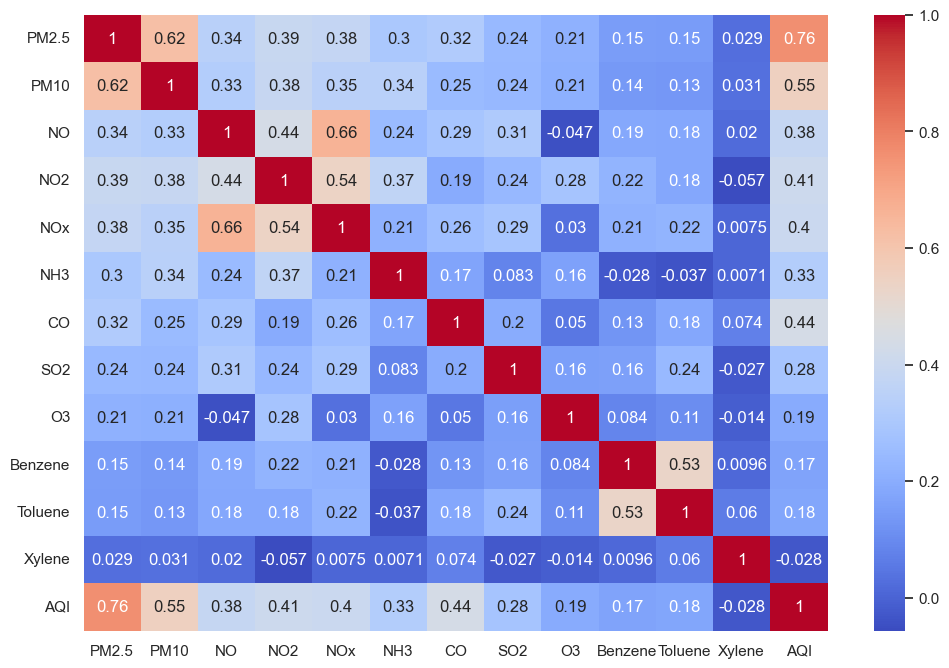

In [47]:
#multivariate analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Modeling

In [48]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [49]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df1 = pd.DataFrame(SS.fit_transform(df), columns = df.columns)
df1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733,0.698559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.261565,-1.289981,-0.550991,-0.050459,-0.435888,-0.728604,-0.927014,-0.314172,-0.564852,0.077392,1.245171,-1.171699,-1.211760
24846,-0.967493,-0.697593,-1.037190,0.009532,-0.622400,-0.778447,-0.845770,0.419882,-0.173713,-0.743133,-0.854500,-1.171699,-0.880028
24847,-1.013678,-0.911518,-1.033766,0.217701,-0.510864,-0.911363,-0.910766,-0.337056,-0.126822,-1.142455,-1.322987,-1.171699,-0.902906
24848,-1.210668,-1.314802,-0.965288,0.201503,-0.481741,-0.981974,-0.845770,-0.087091,-0.278932,-1.147926,-1.325116,-1.171699,-1.063053


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [52]:
#Feature & target variable Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
Y = df['AQI']

In [53]:
#split the Data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [54]:
#Linear RegressionModel
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)


In [55]:
#Evaluation for Linear Regression
RMSE_train = mean_squared_error(Y_train, Y_pred_train, squared = False)
RMSE_test = mean_squared_error(Y_test, Y_pred_test, squared = False)
r2Score_train = r2_score(Y_train, Y_pred_train)
r2Score_test = r2_score(Y_test, Y_pred_test)
print("RMSE Training Data: ", RMSE_train)
print("RMSE test Data: ",RMSE_test)
print("Varience: ", RMSE_test - RMSE_train)
print("_"* 60)
print("R square value for train: ", r2Score_train)
print("R square value for test: ", r2Score_test)

RMSE Training Data:  51.9564856309237
RMSE test Data:  50.65249453685598
Varience:  -1.3039910940677188
____________________________________________________________
R square value for train:  0.6502607655373065
R square value for test:  0.6561919302669187


In [56]:
#KNN 
KNN = KNeighborsRegressor()
KNN.fit(X_train, Y_train)
Y_pred_train = KNN.predict(X_train)
Y_pred_test = KNN.predict(X_test)

In [57]:
#Evaluation for KNN
RMSE_train = mean_squared_error(Y_train, Y_pred_train, squared=False)
RMSE_test = mean_squared_error(Y_test, Y_pred_test, squared=False)
r2Score_train = r2_score(Y_train, Y_pred_train)
r2Score_test = r2_score(Y_test, Y_pred_test)
print("RMSE Training Data: ", RMSE_train)
print("RMSE test Data: ",RMSE_test)
print("Varience: ", RMSE_test - RMSE_train)

print("_"* 60)
print("R square value for train: ", r2Score_train)
print("R square value for test: ", r2Score_test)

RMSE Training Data:  35.80896523744902
RMSE test Data:  43.41477351496996
Varience:  7.605808277520936
____________________________________________________________
R square value for train:  0.8338698859615046
R square value for test:  0.7474255192651769


In [58]:
#Decision Tree
dtr = tree = DecisionTreeRegressor(
#     max_depth=5,  # Restrict depth
#     min_samples_split=10,  # At least 10 samples to split a node
#     min_samples_leaf=5,  # At least 5 samples per leaf
#     max_leaf_nodes=20  # Limit total leaves
)
dtr.fit(X_train, Y_train)
Y_pred_train = dtr.predict(X_train)
Y_pred_test = dtr.predict(X_test)

In [59]:
#Evaluation for Decision Tree
RMSE_train = mean_squared_error(Y_train, Y_pred_train, squared=False)
RMSE_test = mean_squared_error(Y_test, Y_pred_test, squared=False)
r2Score_train = r2_score(Y_train, Y_pred_train)
r2Score_test = r2_score(Y_test, Y_pred_test)
print("RMSE Training Data: ", RMSE_train)
print("RMSE test Data: ",RMSE_test)
print("Varience: ", RMSE_test - RMSE_train)

print("_"* 60)
print("R square value for train: ", r2Score_train)
print("R square value for test: ", r2Score_test)

RMSE Training Data:  2.201758798776742
RMSE test Data:  48.20944819310885
Varience:  46.007689394332104
____________________________________________________________
R square value for train:  0.9993719354207525
R square value for test:  0.6885569022402838


In [60]:
#Random forest
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
Y_pred_train = rfr.predict(X_train)
Y_pred_test = rfr.predict(X_test)

In [61]:
#Evaluation for Random forest
RMSE_train = mean_squared_error(Y_train, Y_pred_train, squared=False)
RMSE_test = mean_squared_error(Y_test, Y_pred_test, squared=False)
r2Score_train = r2_score(Y_train, Y_pred_train)
r2Score_test = r2_score(Y_test, Y_pred_test)
print("RMSE Training Data: ", RMSE_train)
print("RMSE test Data: ",RMSE_test)
print("Varience: ", RMSE_test - RMSE_train)

print("_"* 60)
print("R square value for train: ", r2Score_train)
print("R square value for test: ", r2Score_test)

RMSE Training Data:  13.208923636827718
RMSE test Data:  34.016844292725416
Varience:  20.807920655897696
____________________________________________________________
R square value for train:  0.977395251518021
R square value for test:  0.8449390524641397


In [62]:
#Bagging
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(estimator = DecisionTreeRegressor(),
                         max_samples = 0.6,
                         max_features = 0.7,
                         n_estimators = 100,
                         )
br.fit(X_train, Y_train)
Y_pred_train = br.predict(X_train)
Y_pred_test = br.predict(X_test)

In [63]:
#Evaluation for Bagging
RMSE_train = mean_squared_error(Y_train, Y_pred_train, squared=False)
RMSE_test = mean_squared_error(Y_test, Y_pred_test, squared=False)
r2Score_train = r2_score(Y_train, Y_pred_train)
r2Score_test = r2_score(Y_test, Y_pred_test)
print("RMSE Training Data: ", RMSE_train)
print("RMSE test Data: ",RMSE_test)
print("Varience: ", RMSE_test - RMSE_train)

print("_"* 60)
print("R square value for train: ", r2Score_train)
print("R square value for test: ", r2Score_test)

RMSE Training Data:  19.710533883949147
RMSE test Data:  34.454727912979564
Varience:  14.744194029030417
____________________________________________________________
R square value for train:  0.9496659824890696
R square value for test:  0.8409212980276853
